# Display subject/experiment sessions in calendar view

In [158]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), "..", "code"))

import datetime

# External dependencies
import wavio
import soundsig
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from soundsig.sound import spectrogram, plot_spectrogram

# Modules from this repository
from load_data import load_data, load_stimulus
from plotting import plot_data
plt.pcolormesh

<function matplotlib.pyplot.pcolormesh(*args, alpha=None, norm=None, cmap=None, vmin=None, vmax=None, shading='flat', antialiased=False, data=None, **kwargs)>

In [72]:
df = load_data()

In [159]:
legend = {
    0: "#FDFEFE",
    
    "SovsSo_1v1": "#AED6F1",
    "SovsSo_4v4": "#85C1E9",
    "SovsSo_8v8_d1": "#5DADE2",
    "SovsSo_8v8_d2": "#3498DB",
    
    "SovsSo_1v1_S2": "#F7DC6F",
    "SovsSo_4v4_S2": "#F4D03F",
    "SovsSo_8v8_d1_S2": "#F1C40F",
    "SovsSo_8v8_d2_S2": "#D4AC0D",
    
    "DCvsDC_1v1": "#A3E4D7",
    "DCvsDC_4v4": "#76D7C4",
    "DCvsDC_6v6_d1": "#48C9B0",
    "DCvsDC_6v6_d2": "#1ABC9C",
    
    "DCvsDC_1v1_S2": "#E59866",
    "DCvsDC_4v4_S2": "#DC7633",
    "DCvsDC_6v6_d1_S2": "#D35400",
    "DCvsDC_6v6_d2_S2": "#BA4A00",
    
    "SovsSo_16v16": "#AEB6BF",
    "DCvsDC_12v12": "#AEB6BF",
    "AllvsAll_4v4": "#85929E",
    "AllvsAll_28v28": "#5D6D7E",
}

In [160]:
class Calendar(object):
    def __init__(self, shape, dtype=np.float):
        self._data = np.zeros(shape, dtype=dtype)
        
    def get_pos(self, idx):
        row = idx // self._data.shape[2]
        col = idx % self._data.shape[2]
        month = row // self._data.shape[1]
        row = row % self._data.shape[1]
        return (month, row, col)
    
    @property
    def grid(self):
        return self._data
    
    def set(self, pos, value):
        self._data[pos] = value
        
    def set_by_idx(self, idx, value):
        self._data[self.get_pos(idx)] = value


def generate_pseudo_calendar(days, rows=5, columns=7, shape=tuple(), dtype=np.float):
    n_months = days // (rows * columns) + 1
    
    shape = (n_months, rows, columns) + shape
    grid = Calendar(shape, dtype=dtype)
    
    return grid

def plot_calendar(cal, show_months=None, ax=None):
    if ax is None:
        ax = plt.gca()
    
    n_months = show_months or cal.grid.shape[0]
    
    x_pos = 0
    if cal.grid.ndim == 3:
        for month_idx in range(n_months):
            
            # draw grid lines
            plt.vlines(x_pos + np.arange(8), 0, cal.grid.shape[1], alpha=0.1, color="Grey")
            plt.hlines(np.arange(cal.grid.shape[1] + 1), x_pos, x_pos + cal.grid.shape[2], alpha=0.1, color="Grey")
            
            
            if month_idx < cal.grid.shape[0]:
                x, y = cal.grid[month_idx].shape
                for i in range(x):
                    for j in range(y):
                        ax.add_patch(
                            patches.Rectangle(
                                (x_pos + j, x - i - 1),
                                1,
                                1,
                                facecolor=legend.get(cal.grid[month_idx, i, j], "#99A3A4")
                            )
                        )
            x_pos += 8
            plt.vlines(x_pos - 0.5, 0, cal.grid.shape[1])
            
    ax.set_xlim(0, x_pos)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks(np.arange(cal.grid.shape[1] + 1) + 0.5)
    ax.set_yticklabels(np.arange(cal.grid.shape[1], 0, -1, dtype=np.int))
    ax.tick_params(axis=u'both', which=u'both',length=0)


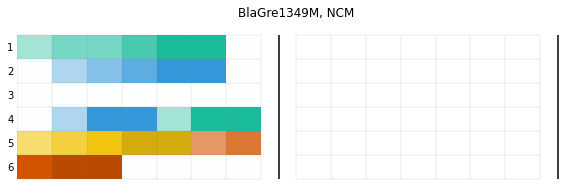

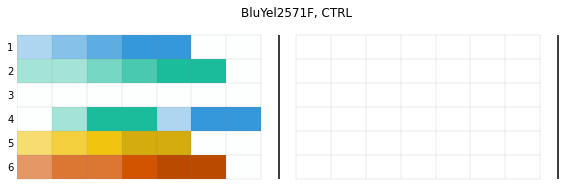

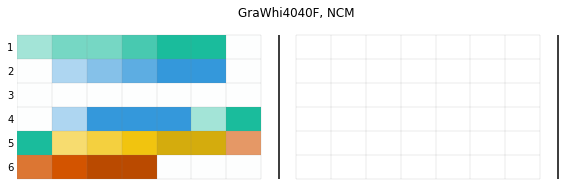

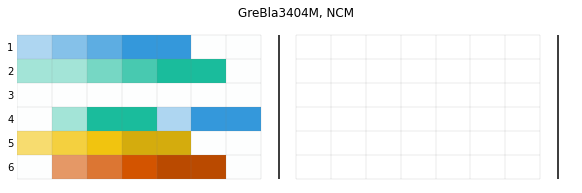

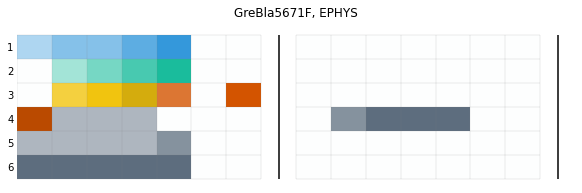

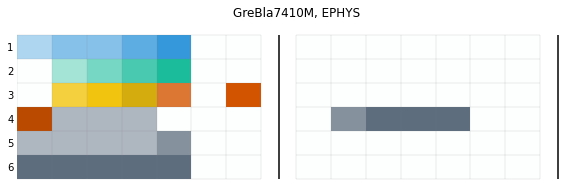

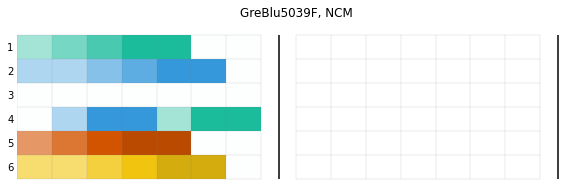

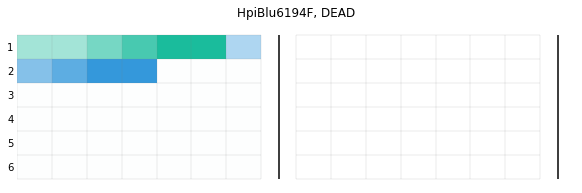

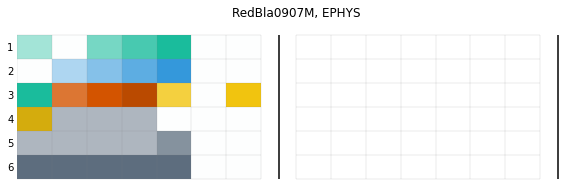

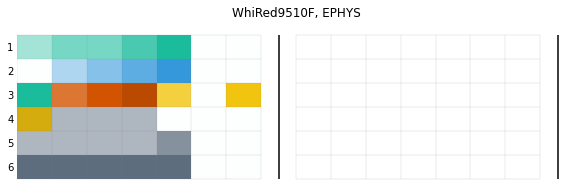

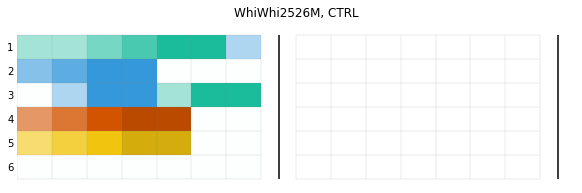

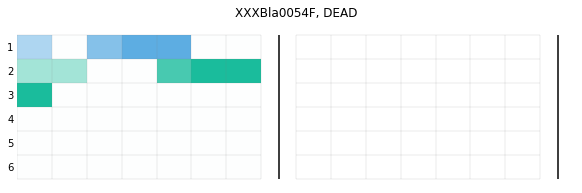

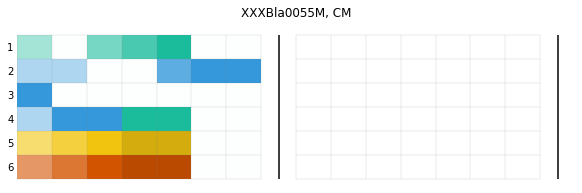

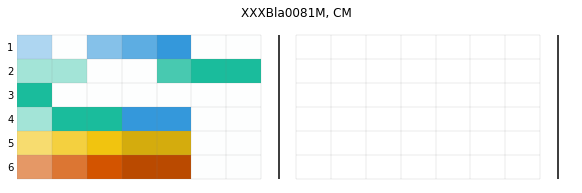

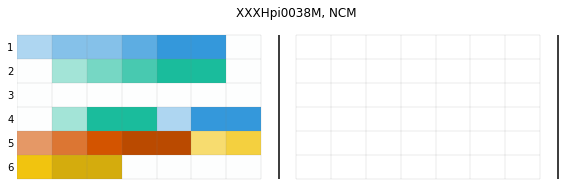

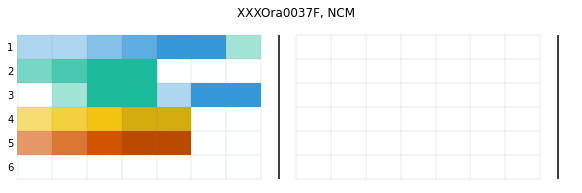

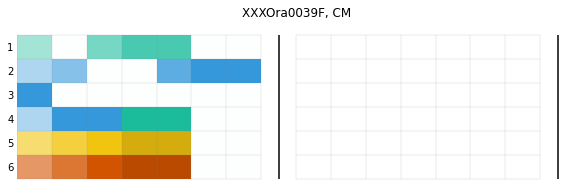

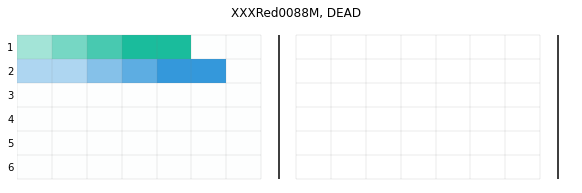

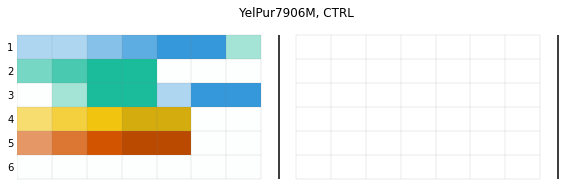

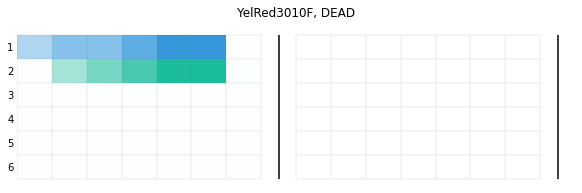

In [161]:
for (subject, subject_group), subject_df in df.groupby(["Subject", "Subject Group"]):
    dates = sorted(subject_df.Date.unique())
    first = dates[0]
    last = dates[-1]
    
    n_days = (last - first).days
    calendar = generate_pseudo_calendar(n_days, rows=6, dtype=object)
    
    for (date, test_context), _  in subject_df.groupby(["Date", "Test Context"]):
        calendar.set_by_idx((date - first).days, test_context)
    
    fig = plt.figure(figsize=(10, 3))
    ax = plt.gca()
    ax.set_title("{}, {}".format(subject, subject_group))
    plot_calendar(calendar, show_months=2, ax=ax)
    plt.show()